In [1]:
# top:
# %pip install lightgbm
# !pip install lightgbm
# %conda install lightgbm -y
# !conda install lightgbm -y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
import lightgbm as lgb
from datetime import datetime
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# from imblearn.under_sampling import RandomUnderSampler

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.max_colwidth')

# pd.reset_option('all')

anomaly_data = pd.read_csv("rawtable-anomaly.csv")

In [2]:
# desired_columns = ['Y', 'Data', 'XAU BGNL', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP','Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'EONIA','LUMSTRUU']
desired_columns = ['Y', 'Data', 'XAU BGNL', 'BDIY', 'CRY', 'DXY', 'VIX']

In [3]:
new_anomaly_data = anomaly_data[desired_columns]

/var/folders/pg/wwfxmq4x1vx_t00m5pz1z4nr0000gp/T/ipykernel_17110/2643173572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = pd.to_datetime(df['Data'])
/var/folders/pg/wwfxmq4x1vx_t00m5pz1z4nr0000gp/T/ipykernel_17110/2643173572.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Data'].dt.year
/var/folders/pg/wwfxmq4x1vx_t00m5pz1z4nr0000gp/T/ipykernel_17110/2643173572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using


Fold 1
SMOTE failed - using original data
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Number of positive: 75, num

/Users/paulc1/miniforge3/envs/anomolly-detection/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/paulc1/miniforge3/envs/anomolly-detection/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/Users/paulc1/miniforge3/envs/anomolly-detection/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

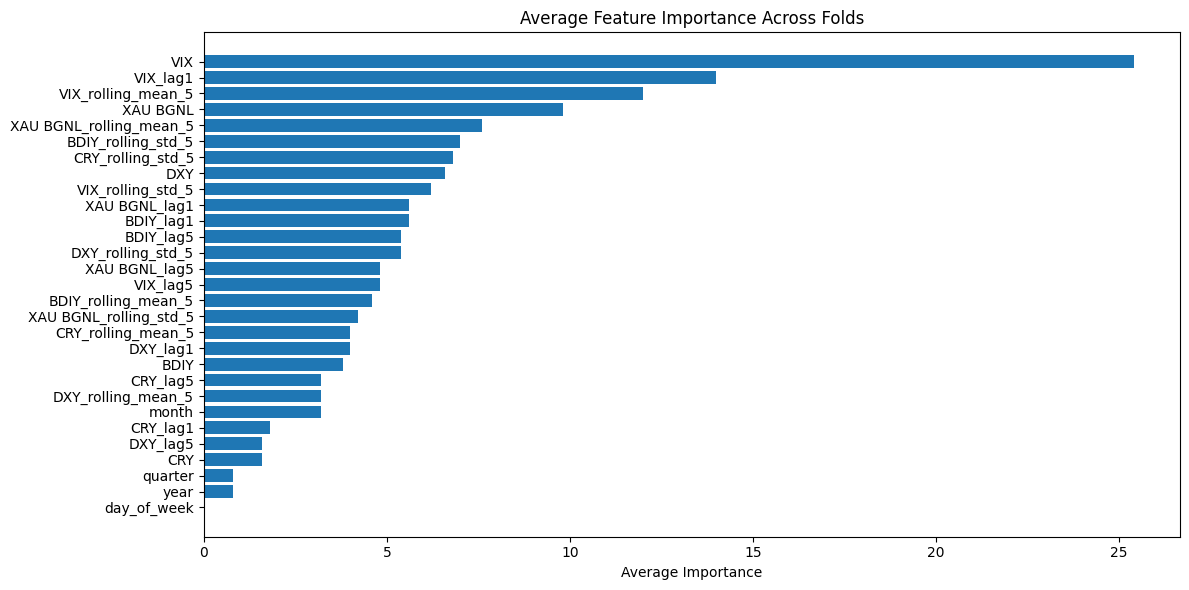

In [4]:
#  section: lightgbm

# First, create time-based features
def create_time_features(df):
    # Convert 'Data' to datetime if it isn't already
    df['Data'] = pd.to_datetime(df['Data'])
    
    # Extract time features
    df['year'] = df['Data'].dt.year
    df['month'] = df['Data'].dt.month
    df['day_of_week'] = df['Data'].dt.dayofweek
    df['quarter'] = df['Data'].dt.quarter
    
    # Create lag features
    for col in ['XAU BGNL', 'BDIY', 'CRY', 'DXY', 'VIX']:
        df[f'{col}_lag1'] = df[col].shift(1)
        df[f'{col}_lag5'] = df[col].shift(5)
        
        # Rolling statistics
        df[f'{col}_rolling_mean_5'] = df[col].rolling(window=5).mean()
        df[f'{col}_rolling_std_5'] = df[col].rolling(window=5).std()
    
    # Drop NaN values created by lag features
    df = df.dropna()
    
    return df

# Prepare data
data_with_features = create_time_features(new_anomaly_data)
X = data_with_features.drop(['Y', 'Data'], axis=1)
y = data_with_features['Y']

# Initialize metrics storage
accuracy_scores = []
f1_scores = []
auc_scores = []
feature_importance_df = pd.DataFrame()

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"\nFold {fold + 1}")
    
    # Split data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Scale features
    # scaler = StandardScaler()
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    # Calculate class weights
    n_minority = len(y_train[y_train==1])
    k_neighbors = n_minority - 1
    
    try:
        # Apply SMOTE
        smote = SMOTE(
            random_state=42,
            # k_neighbors=k_neighbors,
            k_neighbors=min(5, n_minority-1),
            sampling_strategy=0.3
        )
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
        print(f"Applied SMOTE with {k_neighbors} neighbors")
    except ValueError:
        print("SMOTE failed - using original data")
        X_train_balanced, y_train_balanced = X_train_scaled, y_train
    
    # Initialize LightGBM model
    model = lgb.LGBMClassifier(
        objective='binary',
        boosting_type='gbdt',
        n_estimators=100,
        learning_rate=0.1,
        min_child_samples=20,
        max_depth=4,
        num_leaves=15,
        feature_fraction=0.7,
        bagging_fraction=0.7,
        bagging_freq=5,
        class_weight='balanced',
        early_stopping_rounds=20,
        random_state=42
        # verbose=False
    )
    
    # Train model
    model.fit(
        X_train_balanced, y_train_balanced,
        eval_set=[(X_test_scaled, y_test)],
        eval_metric='auc',
        # early_stopping_rounds=20,
        # verbose=False
    )
    
    # Make predictions
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Find optimal threshold
    thresholds = np.arange(0.3, 0.8, 0.05)
    best_f1 = 0
    best_threshold = 0.5
    
    for threshold in thresholds:
        y_pred_temp = (y_pred_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    # Final predictions
    y_pred = (y_pred_proba >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store metrics
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auc_scores.append(auc)
    
    # Store feature importance
    fold_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_,
        'fold': fold + 1
    })
    feature_importance_df = pd.concat([feature_importance_df, fold_importance])
    
    print(f"Optimal Threshold: {best_threshold:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"AUC-ROC: {auc:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Print overall results
print("\nOverall Results:")
print(f"Average Accuracy: {np.mean(accuracy_scores):.3f} (±{np.std(accuracy_scores):.3f})")
print(f"Average F1-Score: {np.mean(f1_scores):.3f} (±{np.std(f1_scores):.3f})")
print(f"Average AUC-ROC: {np.mean(auc_scores):.3f} (±{np.std(auc_scores):.3f})")

# Plot feature importance
plt.figure(figsize=(12, 6))
avg_importance = feature_importance_df.groupby('feature')['importance'].mean().sort_values(ascending=True)
plt.barh(range(len(avg_importance)), avg_importance)
plt.yticks(range(len(avg_importance)), avg_importance.index)
plt.xlabel('Average Importance')
plt.title('Average Feature Importance Across Folds')
plt.tight_layout()
plt.show()